# HOW TO PLOT AN INTERSECTION BETWEEN A SURFACE AND A PLANE

Let us start from a simple curve: 

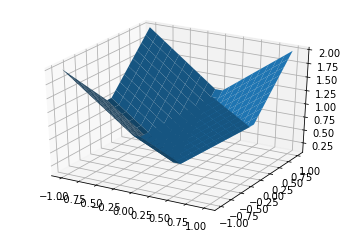

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
Z = abs(X) + abs(Y)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.show()

Now let us try to add a simple plane, like z = 1

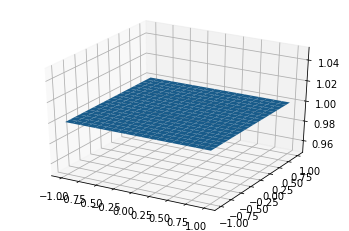

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
Z = X/X + Y/Y - 1 


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.show()

Now, let us try to plot both in the same figure:

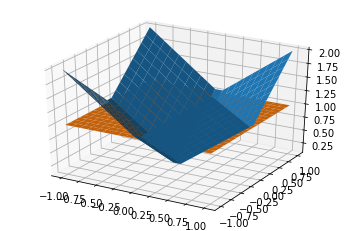

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, F)
surf2 = ax.plot_surface(X, Y, G)
plt.show()

The figure is not very clear, let us see if it gets clearer if I use a wireframe:

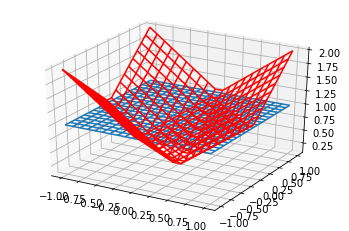

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(X, Y, F, color="red")
surf2 = ax.plot_wireframe(X, Y, G)
plt.show()

It is not a lot better. Let us see if it is clearer with a different point of view: 

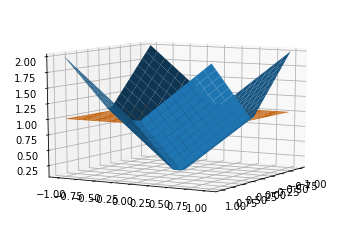

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X, Y, F)
surf2 = ax.plot_surface(X, Y, G)
plt.show()

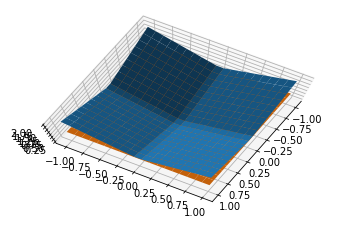

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=80., azim=30)
surf = ax.plot_surface(X, Y, F)
surf2 = ax.plot_surface(X, Y, G)
plt.show()

Mmmm this is somewhat disappointing, I will try to investigate later if there is an easy way to show the plane intersecting a surface. 
For now I would like to see how it is possible to establish the "intersection curve", so that we could potentially create a new solid out of this and also evaluate the volume of this solid using integrals. 

In order to figure out the curve I should set F = G. 
Since G = 1, the intersection curve is simply abs(Y) = 1 - abs(X) 

In [13]:
X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
print(Y)

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 0.94736842 0.84210526
 0.73684211 0.63157895 0.52631579 0.42105263 0.31578947 0.21052632
 0.10526316 0.        ]


This is the result for only the positive Y, we will have to extend this to get the negative points.
Let us try this. 

In [7]:
X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
x = np.linspace(-1,1,20)
y = abs(x) - 1
x = np.append(x,X)
y = np.append(y,Y)
print(y)

[ 0.         -0.10526316 -0.21052632 -0.31578947 -0.42105263 -0.52631579
 -0.63157895 -0.73684211 -0.84210526 -0.94736842 -0.94736842 -0.84210526
 -0.73684211 -0.63157895 -0.52631579 -0.42105263 -0.31578947 -0.21052632
 -0.10526316  0.          0.          0.10526316  0.21052632  0.31578947
  0.42105263  0.52631579  0.63157895  0.73684211  0.84210526  0.94736842
  0.94736842  0.84210526  0.73684211  0.63157895  0.52631579  0.42105263
  0.31578947  0.21052632  0.10526316  0.        ]


Let us try if this works:

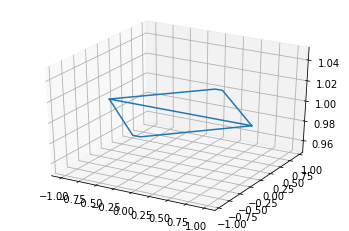

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
x = np.linspace(-1,1,20)
y = abs(x) - 1
x = np.append(x,X)
y = np.append(y,Y)
z = abs(x) + abs(y)

fig = plt.figure()
ax = fig.gca(projection='3d')
curve = ax.plot(x,y,z)
plt.show()

Almost there, but I think we have an error, since the points in x have a discontinuity. 
We can fix this by reversing X using np.flip()

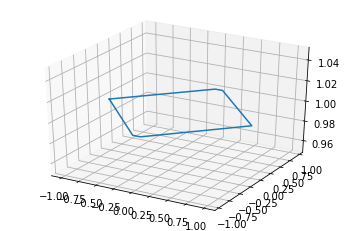

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
x = np.linspace(-1,1,20)
y = abs(x) - 1
x = np.append(x,np.flip(X))
y = np.append(y,Y)
z = abs(x) + abs(y)

fig = plt.figure()
ax = fig.gca(projection='3d')
curve = ax.plot(x,y,z)
plt.show()

Let us see now if we can plot the intersection on top of the surface:

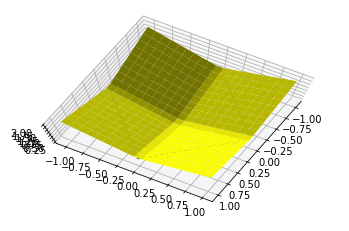

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
x = np.linspace(-1,1,20)
y = abs(x) - 1
x = np.append(x,np.flip(X))
y = np.append(y,Y)
z = abs(x) + abs(y)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
Z = abs(X) + abs(Y)



fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=80., azim=30)
curve = ax.plot(x,y,z)
surf = ax.plot_surface(X, Y, Z, color="yellow")
plt.show()

The curve can barely be seen and I had to tweak a few times: it disappears completely if the surface is plotted before the curve and it can only be seen from above, but I think this plot shows that the concept is sound. 
Now I will need to find a way to set the curve as "boundary" for my meshgrid coordinates. 

The function meshgrid generates a "plane" of xy coordinates but I don't think this can be altered to describe a different area. 
Let us try: 

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
_______
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


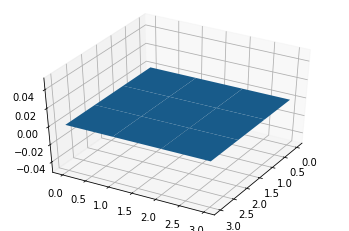

In [17]:
x = [0,1,2,3]
y = [0,1,2,3]
X,Y = np.meshgrid(x,y)
print(X)
print("_______")
print(Y)

Z = 0*X
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=40., azim=30)
surf = ax.plot_surface(X, Y, Z)
plt.show()

[[0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]]
_______
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


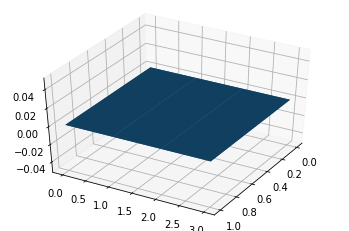

In [18]:
x = [0,1,1,0]
y = [0,1,2,3]
X,Y = np.meshgrid(x,y)
print(X)
print("_______")
print(Y)

Z = 0*X
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=40., azim=30)
surf = ax.plot_surface(X, Y, Z)
plt.show()

[[ 1  1  1  1]
 [ 1  1  2  2]
 [ 0  1  2  3]
 [-1  1  2  4]]
_______
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


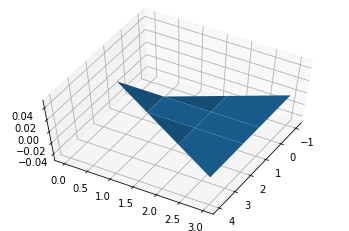

In [21]:
x = [0,1,2,3]
y = [0,1,2,3]
X,Y = np.meshgrid(x,y)
X[0] = [1.5,1.5,1.5,1.5]
X[1] = [1,1,2,2]
X[3] = [-1,1,2,4]
Y[0] = [0.5,0.5,0.5,0.5]
print(X)
print("_______")
print(Y)

Z = 0*X
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=60., azim=30)
surf = ax.plot_surface(X, Y, Z)
plt.show()

Ok, this has proven that it is sort of possible to create a flat surface using meshgrid, but it is not easy at all! 
For some strange reason also we cannot modify manually the array values to floats but they get rounded to integers, even if above we have used all floats with lots of decimals. I will have to figure out why and solve this. 

In a way though this exercise makes me think that the only important points are the first and the last. 
If this is true it could lead to an algorithm/function. 
Basically we know that for each x the values will have to go from y=abs(x)-1 to Y=1-abs(x). 
We will have to figure out how to fill in the points in the middle. 

[[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]


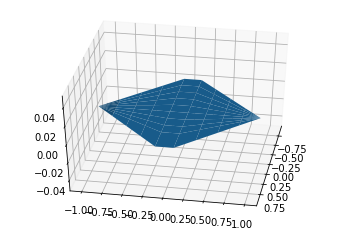

In [87]:
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
x,y = np.meshgrid(x,y)
print(x)
print("____________________________")
print(y)
print("____________________________")
for p in range(10):
    for q in range(10):
        if q == 0:
            x[p][q] = abs(y[p][q])-1
        elif q == 9:
            x[p][q] = 1 - abs(y[p][q])
        else:
            x[p][q] = 2*abs(x[p][0])/10 + x[p][q-1]
print(x)
z = 0*x
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=40., azim=10)
surf = ax.plot_surface(x, y, z)
plt.show()

This seems to work! 
Let us now put everything together: 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Z contains NaN values. This may result in rendering artifacts.


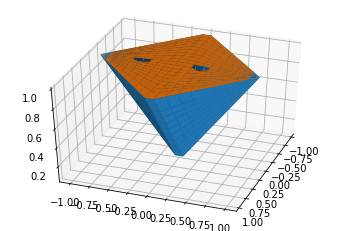

In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)
for p in range(len(X)):
    for q in range(len(X[0])):
        if q == 0:
            X[p][q] = abs(Y[p][q])-1
        elif q == len(X[0])-1:
            X[p][q] = 1 - abs(Y[p][q])
        else:
            X[p][q] = X[p][q-1] + 2*abs(X[p][0])/(len(X[0])) 

F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=40., azim=20)
surf = ax.plot_surface(X, Y, F)
surf2 = ax.plot_surface(X, Y, G)
plt.show()